In [1]:
import pandas as pd

In [2]:
renda = pd.read_csv('dados.csv')

In [3]:
renda

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [5]:
renda.describe().round(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.00,76840.00,76840.00,76840.00,76840.00,76840.00,76840.00
mean,31.91,0.31,44.07,5.03,9.47,2000.38,1.70
std,11.15,0.46,12.48,2.86,4.54,3323.39,0.08
min,11.00,0.00,13.00,0.00,1.00,0.00,1.34
25%,25.00,0.00,34.00,2.00,6.00,788.00,1.65
50%,31.00,0.00,43.00,4.00,11.00,1200.00,1.70
75%,41.00,1.00,53.00,8.00,12.00,2000.00,1.75
max,53.00,1.00,99.00,8.00,17.00,200000.00,2.03


In [6]:
renda['Sexo'].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [7]:
def val(x):
    a = (renda[x].value_counts(normalize = True)*100).round(2)
    return a

In [8]:
val('Cor')

Cor
8    46.75
2    41.40
4    10.92
0     0.46
6     0.46
Name: proportion, dtype: float64

In [9]:
val('Anos de Estudo')

Anos de Estudo
12    27.13
16    14.05
9     10.39
5      8.76
1      7.61
6      5.86
4      3.76
8      3.50
7      3.18
11     2.76
3      2.73
10     2.39
13     2.39
15     1.81
2      1.81
14     1.63
17     0.25
Name: proportion, dtype: float64

In [10]:
frequencia = renda['Sexo'].value_counts()

In [11]:
percentual = renda['Sexo'].value_counts(normalize = True)*100

In [12]:
freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': percentual})

In [13]:
freq_qualitativas

,Frequencia,Porcentagem
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [14]:
freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)

In [15]:
freq_qualitativas['Porcentagem'] = freq_qualitativas['Porcentagem'].round(2)

In [16]:
freq_qualitativas

,Frequencia,Porcentagem
Sexo,,
Masculino,53250,69.3
Feminino,23590,30.7


In [17]:
cor = {0: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

In [18]:
freq = pd.crosstab(renda['Sexo'], renda['Cor'], normalize= True)*100

In [19]:
freq = pd.crosstab(renda['Sexo'], renda['Cor'], aggfunc= 'mean', values = renda['Renda'])

In [20]:
freq.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)

In [21]:
freq.rename(columns = cor, inplace = True)

In [22]:
freq

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [23]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [24]:
labels = ['e', 'd', 'c', 'b', 'a']

In [25]:
pd.cut(x = renda['Renda'], bins = classes, labels = labels, include_lowest = True)

0        e
1        e
2        e
3        c
4        e
        ..
76835    e
76836    e
76837    e
76838    e
76839    e
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['e' < 'd' < 'c' < 'b' < 'a']

In [26]:
renda['Classe'] = pd.cut(x = renda['Renda'], bins = classes, labels = labels, include_lowest= True)

In [27]:
rend = pd.DataFrame(renda['Classe'].value_counts(normalize= True)*100).round(2)

In [28]:
p = {'proportion': 'Porcentagem %'}

In [29]:
rend.rename(columns = p, inplace = True)

In [30]:
rend

,Porcentagem %
Classe,
e,64.75
d,21.73
c,9.89
b,2.83
a,0.79


In [31]:
import numpy as np

In [32]:
n = renda.shape[0]

In [33]:
k = 1 + (10/3)* np.log10(n)

In [34]:
k

17.285291187298853

In [35]:
k = (k.round(0)).astype(int)

In [36]:
k

17

In [37]:
freq_sturges = pd.value_counts(
    pd.cut(
        x = renda['Renda'],
        bins = 17,
             include_lowest= True 
                 ), sort = False
)

C:\Users\pedro\AppData\Local\Temp\ipykernel_4900\1065003008.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_sturges = pd.value_counts(


In [38]:
perc_sturges = pd.value_counts(
    pd.cut(x = renda['Renda'],
           bins = 17, 
           include_lowest= True

    ), sort = False,
    normalize = True
)

C:\Users\pedro\AppData\Local\Temp\ipykernel_4900\3126180705.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  perc_sturges = pd.value_counts(


In [39]:
dist_sturges = pd.DataFrame({'Frequencia': freq_sturges, 'Porcentagem': perc_sturges*100})

In [40]:
dist_sturges


,Frequencia,Porcentagem
Renda,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


In [41]:
import seaborn as sns

<Axes: xlabel='Altura', ylabel='Count'>

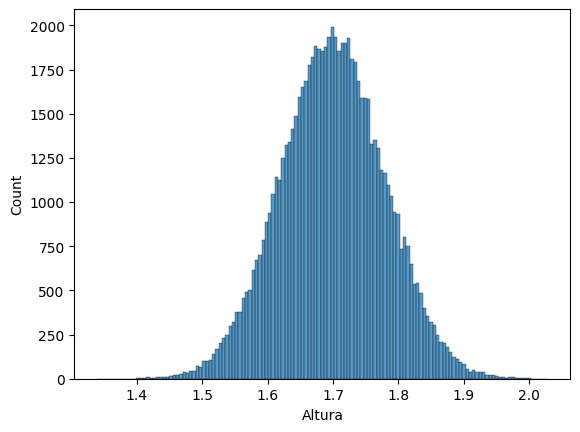

In [42]:
sns.histplot(data = renda['Altura'])

<Axes: >

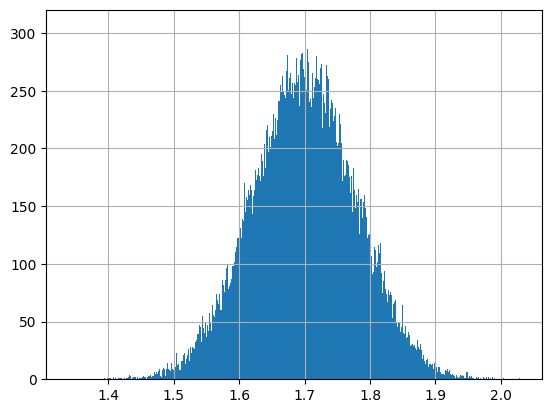

In [43]:
renda['Altura'].hist(bins = 1000)

In [44]:
rend

,Porcentagem %
Classe,
e,64.75
d,21.73
c,9.89
b,2.83
a,0.79


<Axes: ylabel='Classe'>

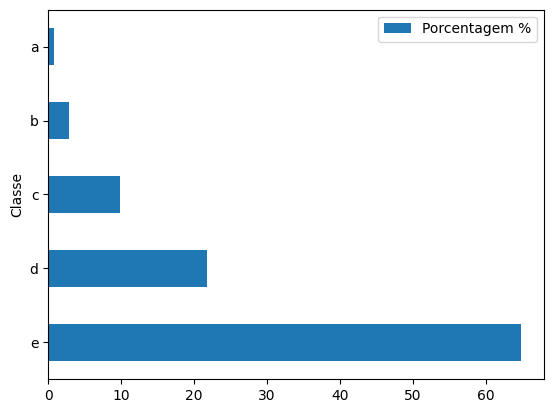

In [48]:
rend.plot(kind = 'barh')

In [55]:
renda['Renda'].mean()

2000.3831988547631

In [56]:
renda['Renda'].median()

1200.0

In [59]:
renda.groupby(['Cor'])[['Renda']].mean().round(2)

,Renda
Cor,
0,1472.89
2,2679.02
4,1442.29
6,4182.92
8,1513.60


In [68]:
renda.groupby(['Sexo'])[['Renda']].median()

,Renda
Sexo,
0,1350.0
1,900.0
